In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\UIDAI\api_data_aadhar_biometric\api_data_aadhar_biometric_0_500000.csv")

In [3]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [4]:
df.shape

(500000, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          500000 non-null  datetime64[ns]
 1   state         500000 non-null  object        
 2   district      500000 non-null  object        
 3   pincode       500000 non-null  object        
 4   bio_age_5_17  500000 non-null  int64         
 5   bio_age_17_   500000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 22.9+ MB


In [7]:
df.duplicated().sum()

np.int64(10318)

In [8]:
#Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['date'].head()

0   2025-03-01
1   2025-03-01
2   2025-03-01
3   2025-03-01
4   2025-03-01
Name: date, dtype: datetime64[ns]

In [10]:
df['pincode'] = df['pincode'].astype(str)
df['pincode']

0         123029
1         852121
2         185101
3         802158
4         625514
           ...  
499995    110041
499996    110043
499997    110058
499998    403102
499999    403106
Name: pincode, Length: 500000, dtype: object

In [12]:
df.dtypes

date            datetime64[ns]
state                   object
district                object
pincode                 object
bio_age_5_17             int64
bio_age_17_              int64
dtype: object

In [13]:
#Remove duplicate rows
df.duplicated().sum()


np.int64(10318)

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(489682, 6)

In [16]:
#Validate logical values
(df[['bio_age_5_17', 'bio_age_17_']] < 0).sum()


bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [17]:
#Detect outliers
df[['bio_age_5_17', 'bio_age_17_']].describe()


,bio_age_5_17,bio_age_17_
count,489682.000000,489682.000000
mean,47.847934,51.370677
std,157.534164,165.971424
min,0.000000,0.000000
25%,1.000000,2.000000
50%,5.000000,6.000000
75%,26.000000,24.000000
max,8002.000000,7625.000000


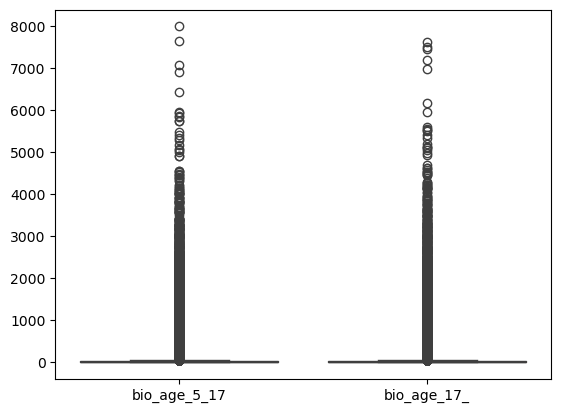

In [ ]:
#Visual check (Boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['bio_age_5_17', 'bio_age_17_']])
plt.show()


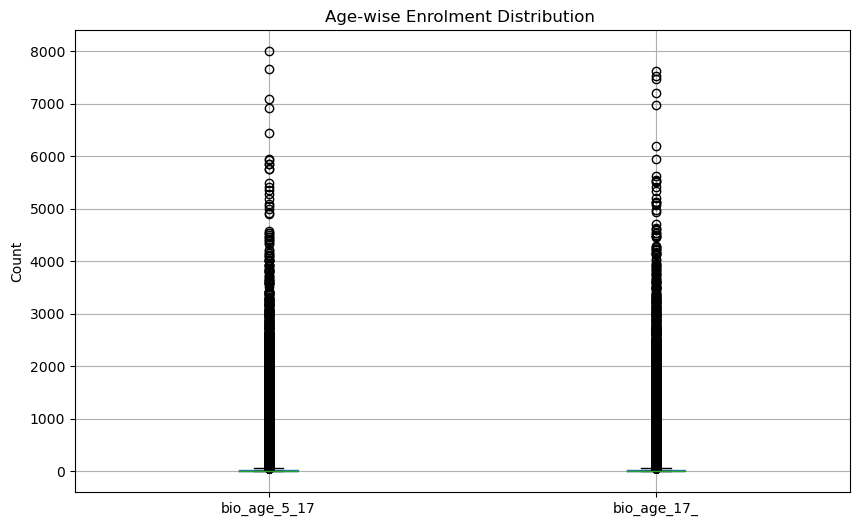

In [37]:
#outliers of data for my 2 age groups of people
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

df[['bio_age_5_17', 'bio_age_17_']].boxplot()

plt.title('Age-wise Enrolment Distribution ')
plt.ylabel('Count')

plt.show()


In [19]:
#Standardize text data (state & district)
df['state'] = df['state'].str.strip().str.title()
df['district'] = df['district'].str.strip().str.title()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\4019792396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state'].str.strip().str.title()
C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\4019792396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = df['district'].str.strip().str.title()


In [20]:
df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu And Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra And Nagar Haveli And Daman And Diu', 'Daman And Diu',
       'Andaman And Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra And Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'Westbengal',
       'West  Bengal', 'West Bangal', 'Uttaranchal', 'Chhatisgarh'],
      dtype=object)

In [21]:
df['state'].nunique()

49

In [22]:
state_mapping = {
    # Andaman & Nicobar
    "Andaman And Nicobar Islands": "Andaman And Nicobar Islands",
    "Andaman & Nicobar Islands": "Andaman And Nicobar Islands",

    # Dadra & Nagar Haveli and Daman & Diu (merged UT)
    "Dadra And Nagar Haveli And Daman And Diu": "Dadra And Nagar Haveli And Daman And Diu",
    "Dadra And Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",
    "Dadra & Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",
    "Daman And Diu": "Dadra And Nagar Haveli And Daman And Diu",
    "Daman & Diu": "Dadra And Nagar Haveli And Daman And Diu",

    # Jammu & Kashmir
    "Jammu And Kashmir": "Jammu And Kashmir",
    "Jammu & Kashmir": "Jammu And Kashmir",

    # West Bengal
    "West Bengal": "West Bengal",
    "Westbengal": "West Bengal",
    "West  Bengal": "West Bengal",
    "West Bangal": "West Bengal",

    # Tamil Nadu
    "Tamil Nadu": "Tamil Nadu",
    "Tamilnadu": "Tamil Nadu",

    # Uttarakhand
    "Uttaranchal": "Uttarakhand",

    # Chhattisgarh
    "Chhatisgarh": "Chhattisgarh",

    # Odisha
    "Orissa": "Odisha",

    # Puducherry
    "Pondicherry": "Puducherry"
}


In [23]:
df['state'] = df['state'].replace(state_mapping)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\3988223951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state'].replace(state_mapping)


In [24]:
sorted(df['state'].unique())

['Andaman And Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra And Nagar Haveli And Daman And Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu And Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [25]:
df['state'].nunique()


36

In [30]:
df['state'].value_counts()

state
Tamil Nadu                                  46297
Andhra Pradesh                              42948
Uttar Pradesh                               42253
Maharashtra                                 39425
Karnataka                                   37598
West Bengal                                 36111
Odisha                                      27563
Kerala                                      24803
Gujarat                                     24292
Bihar                                       22293
Rajasthan                                   21889
Telangana                                   21382
Madhya Pradesh                              18478
Punjab                                      12984
Assam                                       12514
Jharkhand                                    9750
Chhattisgarh                                 8214
Himachal Pradesh                             7327
Haryana                                      6936
Uttarakhand                                 

In [26]:
df.at[33,'date']

Timestamp('2025-03-01 00:00:00')

In [28]:
sorted(df['district'].unique())

['Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmed Nagar',
 'Ahmedabad',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Allahabad',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anugul',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabad(Bh)',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bagalkot *',
 'Bageshwar',
 'Baghpat',
 'Bagpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleshwar',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Bally Jagachha',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bangalore',
 'Bangalore Rural',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatl

In [29]:
df['district'].nunique()

925

In [31]:
df['district'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)      # normalize spaces
    .str.replace(r'\*$', '', regex=True)       # remove trailing *
    .str.replace(r'\.$', '', regex=True)       # remove trailing dot
)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\686054105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = (


In [32]:
sorted(df['district'].unique())

['Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmed Nagar',
 'Ahmedabad',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Allahabad',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anugul',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabad(Bh)',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bagalkot ',
 'Bageshwar',
 'Baghpat',
 'Bagpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleshwar',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Bally Jagachha',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bangalore',
 'Bangalore Rural',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatla

In [33]:
# Ensure district column is string
df['district'] = df['district'].astype(str)

# Clean district names
df['district'] = (
    df['district']
    .str.strip()                                   # remove leading/trailing spaces
    .str.replace('&', 'and', regex=False)          # replace & with 'and'
    .str.replace(r'[^A-Za-z0-9\s]', '', regex=True)  
    # removes ALL symbols, keeps only:
    # letters, digits, and spaces
    .str.replace(r'\s+', ' ', regex=True)          # normalize multiple spaces
    .str.title()                                   # capitalize each word
)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\2940246867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = df['district'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\2940246867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = (


In [34]:
df['district'].nunique()

904

In [35]:
#Clean basic formatting
df['district'] = (
    df['district']
      .str.strip()
      .str.replace(r"\*", "", regex=True)   # remove *
      .str.replace(r"\(.*?\)", "", regex=True)  # remove (Kar), (M), etc.
      .str.replace(r"\s+", " ", regex=True) # fix double spaces
      .str.title()
)
df['district'].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\3587655521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district'] = (


array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga', '

In [41]:
sorted(df['district'].unique())

['Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmed Nagar',
 'Ahmedabad',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Allahabad',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anugul',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabadbh',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bageshwar',
 'Baghpat',
 'Bagpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleshwar',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Bally Jagachha',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bangalore',
 'Bangalore Rural',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatla',
 'Bara Banki'

In [40]:
before_dist=df['district'].nunique()
before_dist

904

In [ ]:


district_mapping = {
    # Gujarat
    "Ahmadabad": "Ahmedabad",

    # Maharashtra
    "Ahmadnagar": "Ahmednagar",
    "Ahmed Nagar": "Ahmednagar",
    "Raebareli": "Rae Bareli",
    'Osmanabad': 'Dharashiv',
    
    # Karnataka
    "Tumkur": "Tumakuru",
    "Belgaum": "Belagavi",
    "Bellary": "Ballari",
    "Bijapur": "Vijayapura",
    "Gulbarga": "Kalaburagi",
    "Bijapur": "Vijayapura",
    "Bijapur Kar": "Vijayapura",
    'Chikmagalur': 'Chikkamagaluru',
    'Chickmagalur': 'Chikkamagaluru',
    'Chamrajanagar': 'Chamarajanagar',
    'Chamrajnagar': 'Chamarajanagar',

    # Tamil Nadu
    "Tuticorin": "Thoothukudi",
    "Villupuram": "Viluppuram",
    "Thoothukkudi": "Thoothukudi",
    "Kanniyakumari": "Kanyakumari",
    
    # Telangana / AP
    "Cuddapah": "Ysr Kadapa",
    "Mahabub Nagar": "Mahabubnagar",
    "Mahbubnagar": "Mahabubnagar",
    "Warangal Urban": "Warangal",
    'Rangareddi': 'Rangareddy',
    'Kvrangareddy': 'Rangareddy',
    'Kv Rangareddy': 'Rangareddy',
    'Medchalmalkajgiri': 'Medchal Malkajgiri',
    'Ysr': 'Ysr Kadapa',
    'Cuddapah': 'Ysr Kadapa',

    # West Bengal
    "East Midnapore": "Purba Medinipur",
    "West Midnapore": "Paschim Medinipur",
    "Burdwan": "Purba Bardhaman",
    "West Medinipur": "Paschim Medinipur",
    "East Midnapur": "Purba Medinipur",
    "Barddhaman": "Purba Bardhaman",
    'North Twenty Four Parganas': 'North 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'Hooghiy': 'Hooghly',
    'Hugli': 'Hooghly',

    # UP
    "Faizabad": "Ayodhya",
    "Allahabad": "Prayagraj",
    "Jyotiba Phule Nagar": "Amroha",
    'Bara Banki': 'Barabanki',

    # Andhra Pradesh
    "Anantapur": "Ananthapuramu",

    # Odisha
    'Baleshwar': 'Baleswar',
    'Anugul': 'Angul',

    # Haryana
    "Yamuna Nagar": "Yamunanagar",

    # Ladakh
    "Leh": "Leh Ladakh",

    # Himachal Pradesh
    'Lahulandspiti': 'Lahaul And Spiti'

}


In [44]:
#before and after district mapping 
df['district'] = df['district'].replace(district_mapping)
after_dist= df['district'].nunique()
before_dist, after_dist

(904, 863)

In [45]:
sorted(df['district'].unique())

['Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmedabad',
 'Ahmednagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Ananthapur',
 'Ananthapuramu',
 'Anantnag',
 'Andamans',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anuppur',
 'Araria',
 'Ariyalur',
 'Arvalli',
 'Arwal',
 'Ashok Nagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabadbh',
 'Ayodhya',
 'Azamgarh',
 'Badgam',
 'Bagalkot',
 'Bageshwar',
 'Baghpat',
 'Bagpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Baleswar',
 'Ballari',
 'Ballia',
 'Bally Jagachha',
 'Balod',
 'Baloda Bazar',
 'Balrampur',
 'Banas Kantha',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Bangalore',
 'Bangalore Rural',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatla',
 'Barabanki',
 'Baramula',
 'Baran',
 'Bardez',
 'Bardhaman',
 'Bareilly',
 'Bargarh',
 'Barmer'

In [46]:
df[['bio_age_5_17', 'bio_age_17_']].max()

bio_age_5_17    8002
bio_age_17_     7625
dtype: int64

In [47]:
#creating a seperate col for month
df['month'] = df['date'].dt.month_name()
df['month'].unique()

array(['March', 'April', 'May', 'June', 'July', 'September'], dtype=object)

In [57]:
month_order=[
    'March','April','May','June','July','September'
]

In [58]:
df['month'] = pd.Categorical(
    df['month'],
    categories=month_order,
    ordered=True
)


In [59]:
df['month'].unique()

['March', 'April', 'May', 'June', 'July', 'September']
Categories (6, object): ['March' < 'April' < 'May' < 'June' < 'July' < 'September']

In [48]:
#Total biometric count in each group
df[['bio_age_5_17', 'bio_age_17_']].sum()

bio_age_5_17    23430272
bio_age_17_     25155296
dtype: int64

In [49]:
#Percentage
total = df[['bio_age_5_17', 'bio_age_17_']].sum().sum()
(df[['bio_age_5_17', 'bio_age_17_']].sum()/total)*100


bio_age_5_17    48.224757
bio_age_17_     51.775243
dtype: float64

In [60]:
#Tabulation based on month
monthly=df.groupby('month')[['bio_age_5_17', 'bio_age_17_']].sum()
monthly

C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\1679907778.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly=df.groupby('month')[['bio_age_5_17', 'bio_age_17_']].sum()


,bio_age_5_17,bio_age_17_
month,,
March,3733578,4588644
April,4356896,4284783
May,3868247,4011709
June,3710149,4189140
July,4499057,5293495
September,3262345,2787525


In [61]:
y_min = monthly[['bio_age_5_17', 'bio_age_17_']].min().min()
y_max = monthly[['bio_age_5_17', 'bio_age_17_']].max().max()

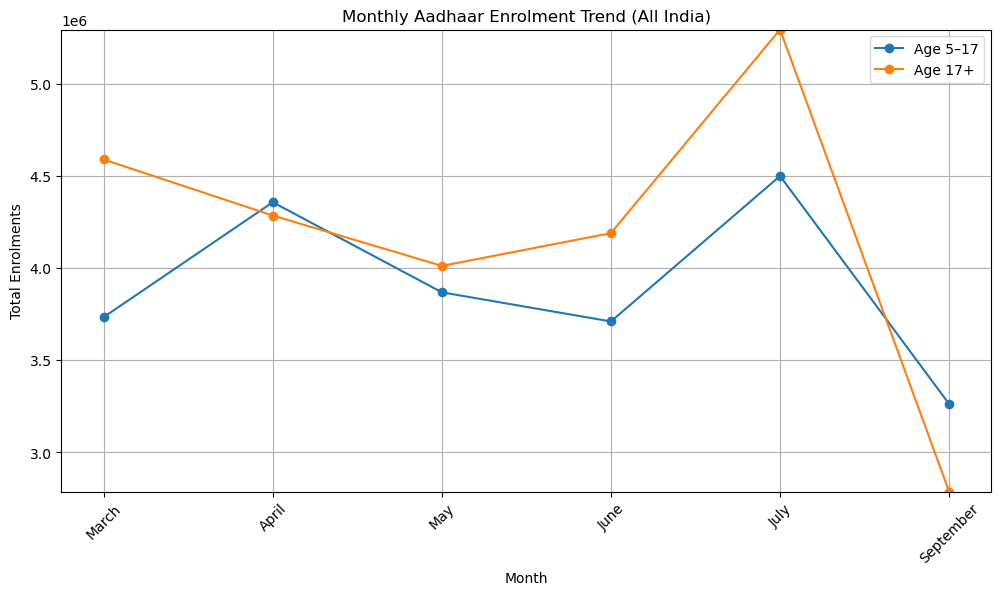

In [62]:
#month and age groups wise line charts
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(monthly.index, monthly['bio_age_5_17'], marker='o', label='Age 5–17')
plt.plot(monthly.index, monthly['bio_age_17_'], marker='o', label='Age 17+')

plt.title('Monthly Aadhaar Enrolment Trend (All India)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')

# ✅ Set y-axis to actual data range
plt.ylim(y_min, y_max)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

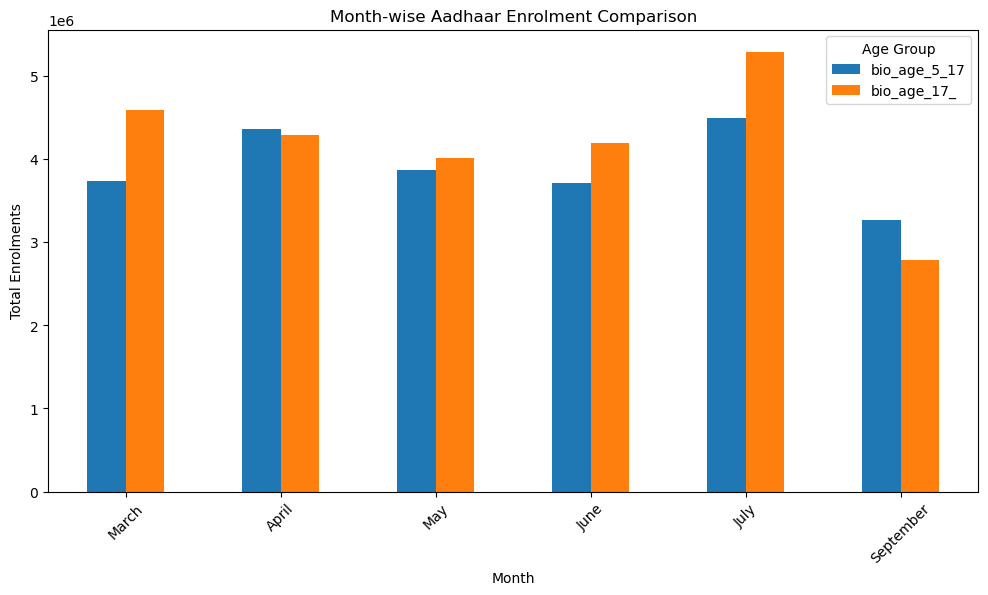

In [63]:
#monthwise and age groups bar plot
monthly.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title('Month-wise Aadhaar Enrolment Comparison')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend(title='Age Group')

plt.show()


In [66]:
state_total=df.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum()
district_total=df.groupby('district')[['bio_age_5_17', 'bio_age_17_']].sum()

state_total

,bio_age_5_17,bio_age_17_
state,,
Andaman And Nicobar Islands,7803,6808
Andhra Pradesh,1580670,976841
Arunachal Pradesh,23119,23488
Assam,370206,204182
Bihar,1650778,1892655
Chandigarh,43226,19539
Chhattisgarh,348113,1273405
Dadra And Nagar Haveli And Daman And Diu,12535,17766
Delhi,426002,604838


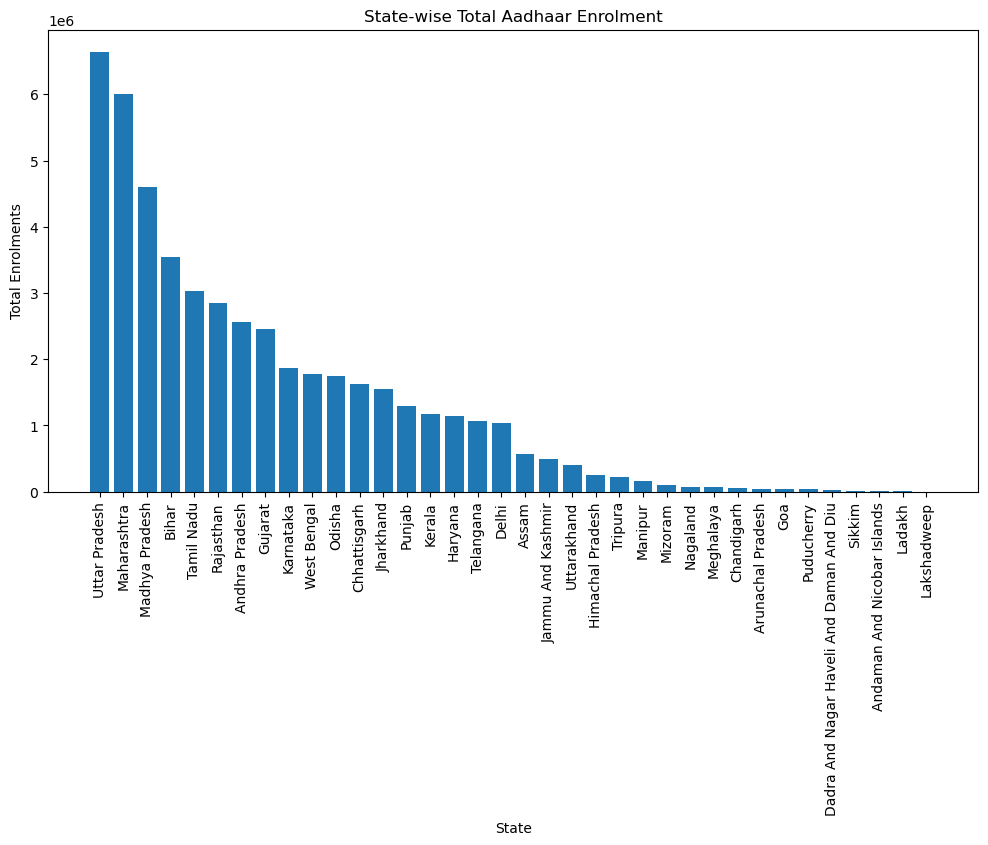

In [67]:
#statewise enrollment graph
# Add total enrolment per state
state_total['total'] = state_total.sum(axis=1)

# Sort by total enrolment
state_total_sorted = state_total.sort_values('total', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_total_sorted.index, state_total_sorted['total'])
plt.title('State-wise Total Aadhaar Enrolment')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=90)
plt.show()

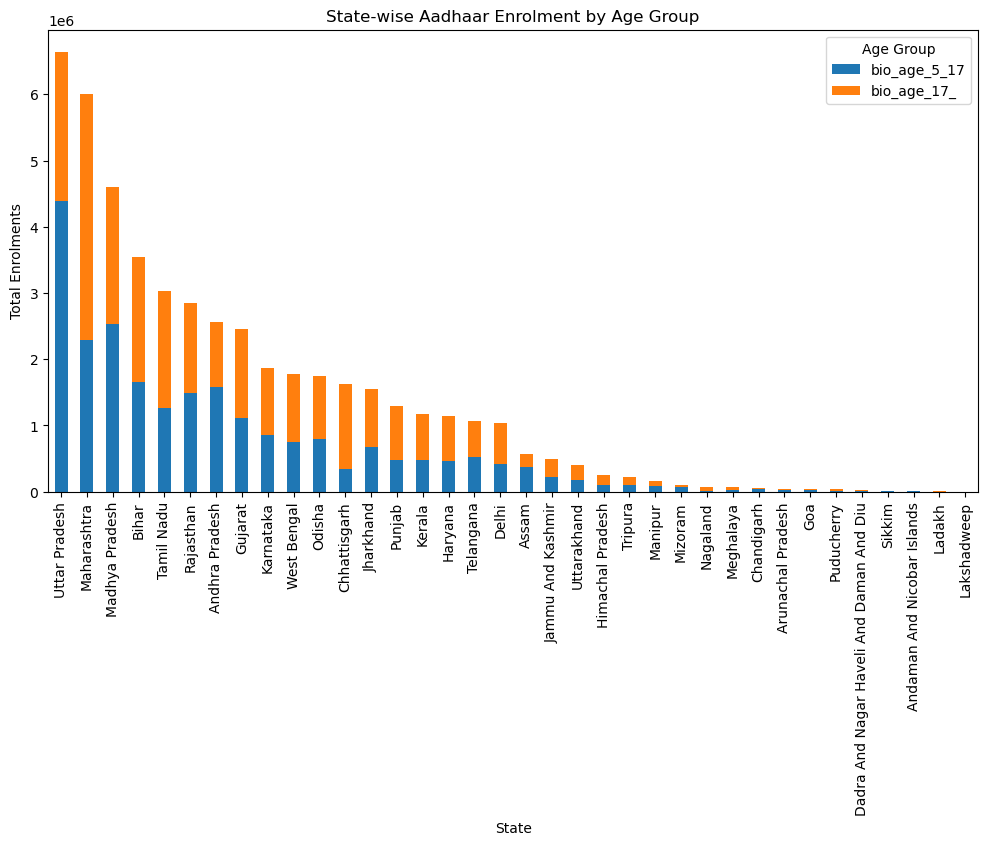

In [69]:
#State-wise Age Group Composition (Stacked Bar Chart)
state_total_sorted[['bio_age_5_17','bio_age_17_']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('State-wise Aadhaar Enrolment by Age Group')
plt.xlabel('State')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=90)
plt.legend(title='Age Group')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\4211880683.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['state', 'month'])['total_enrolment']


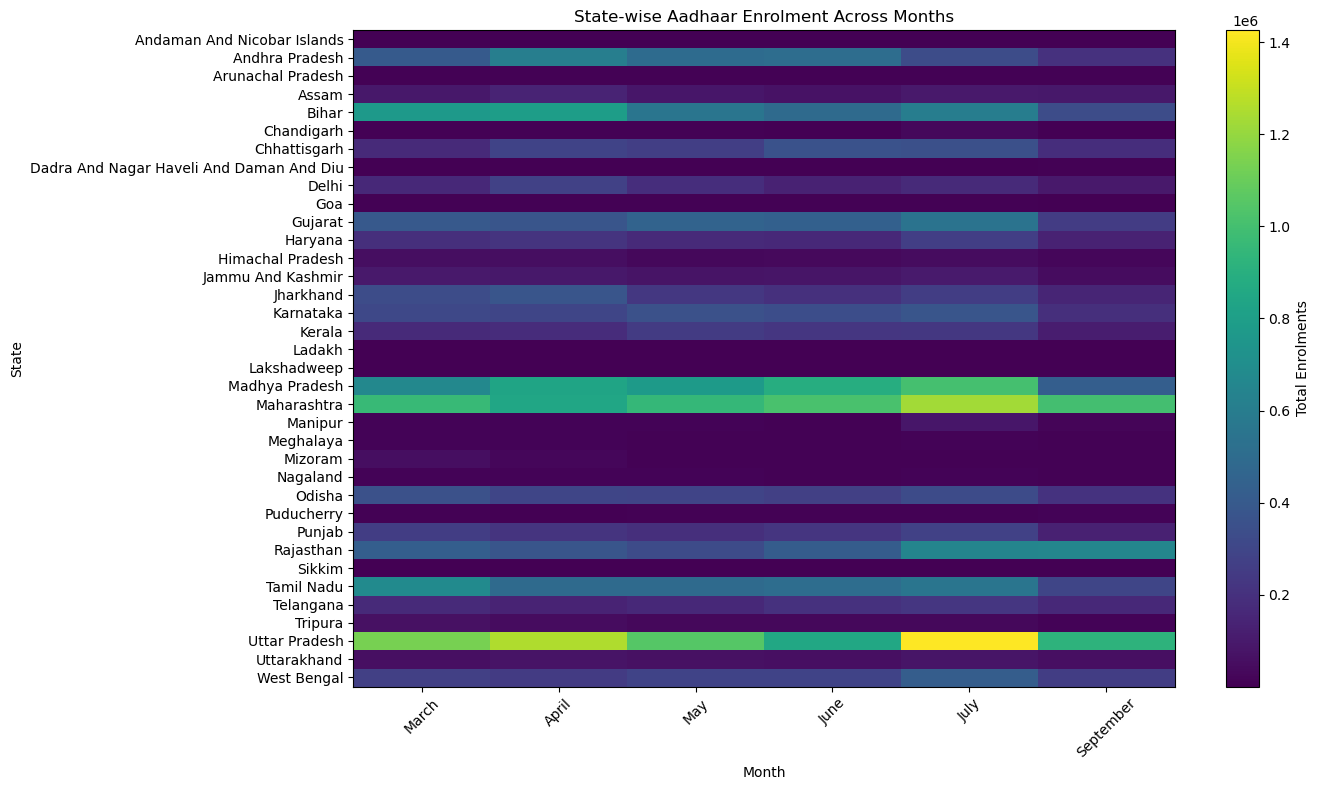

In [70]:
#total enrollment 
df['total_enrolment'] = (
    df['bio_age_5_17'] + df['bio_age_17_']
)
#grouping state, month and total enrollment
state_month = (
    df.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)
month_order = [
    'March', 'April', 'May', 'June','July','September'
]
state_month_pivot = state_month.pivot(
    index='state',
    columns='month',          
    values='total_enrolment'
).reindex(columns=month_order)

#heatmap for state, month and total enrollment in that month
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.imshow(state_month_pivot.fillna(0), aspect='auto')
plt.colorbar(label='Total Enrolments')

plt.title('State-wise Aadhaar Enrolment Across Months')
plt.xlabel('Month')
plt.ylabel('State')

plt.xticks(
    ticks=range(len(state_month_pivot.columns)),
    labels=state_month_pivot.columns,
    rotation=45
)

plt.yticks(
    ticks=range(len(state_month_pivot.index)),
    labels=state_month_pivot.index
)

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\1992280461.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(['state', 'month'])['total_enrolment']


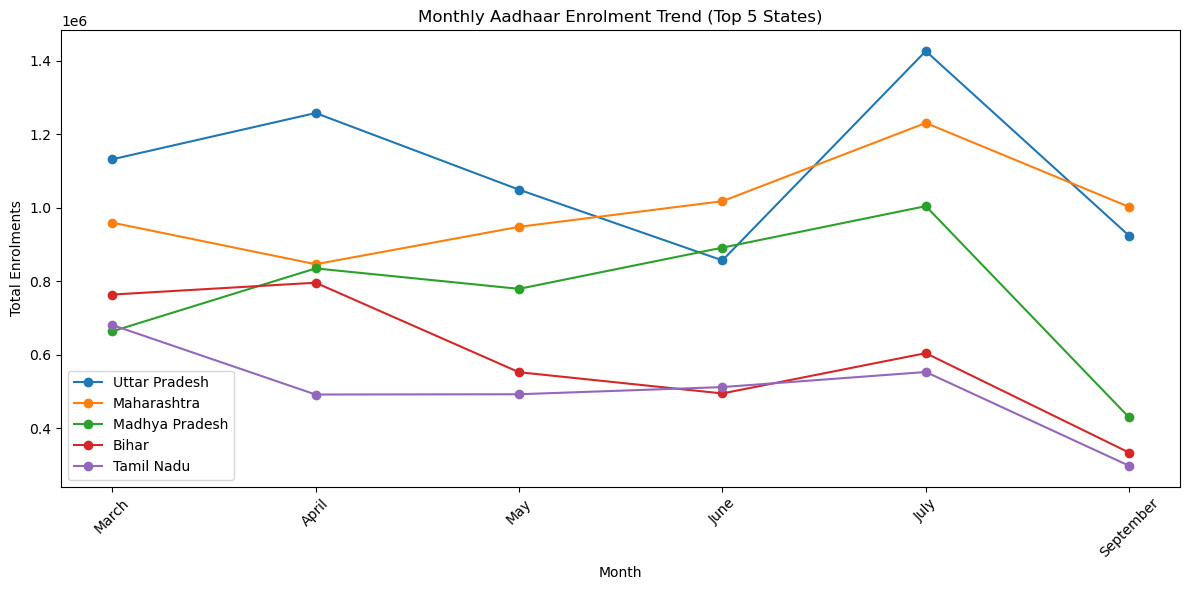

In [71]:
# Select top 5 states by total enrolment based on month
top_states = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data
filtered = df[df['state'].isin(top_states)]

# Aggregate by state and month
state_month_trend = (
    filtered.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(12, 6))

for state in top_states:
    data = state_month_trend[state_month_trend['state'] == state]
    plt.plot(data['month'], data['total_enrolment'], marker='o', label=state)

plt.title('Monthly Aadhaar Enrolment Trend (Top 5 States)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\3417036554.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered.groupby(['state', 'month'])['total_enrolment']


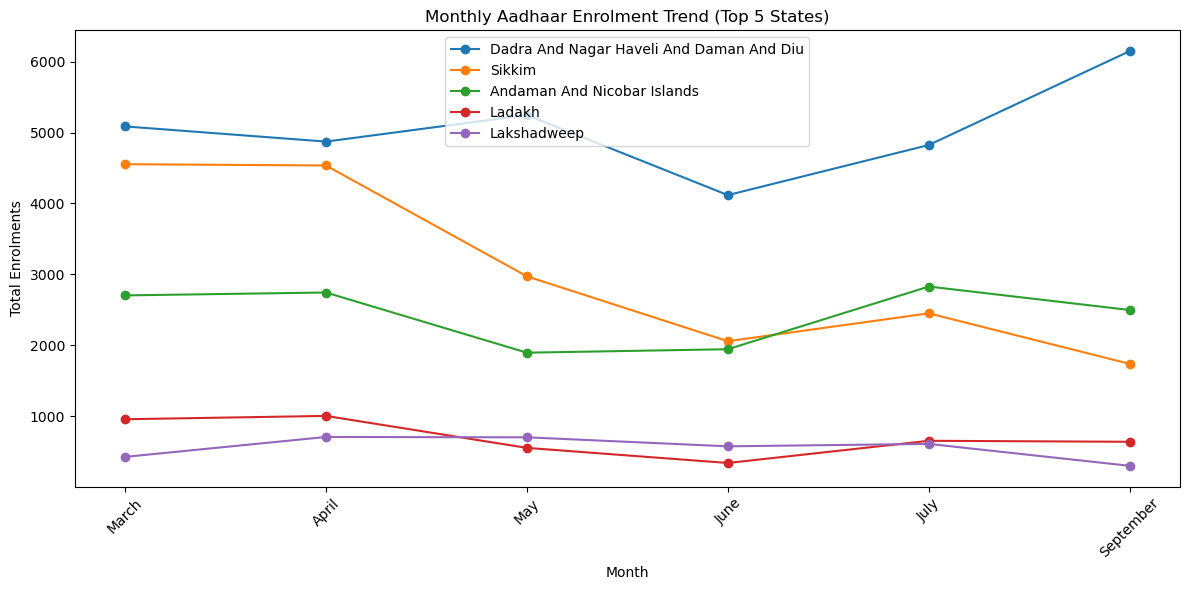

In [72]:
# Select last 5 states by total enrolment based in month
top_states = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .tail(5)
    .index
)

# Filter data
filtered = df[df['state'].isin(top_states)]

# Aggregate by state and month
state_month_trend = (
    filtered.groupby(['state', 'month'])['total_enrolment']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(12, 6))

for state in top_states:
    data = state_month_trend[state_month_trend['state'] == state]
    plt.plot(data['month'], data['total_enrolment'], marker='o', label=state)

plt.title('Monthly Aadhaar Enrolment Trend (Top 5 States)')
plt.xlabel('Month')
plt.ylabel('Total Enrolments')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\1345144187.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\DELL\anaconda3\envs\clean_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


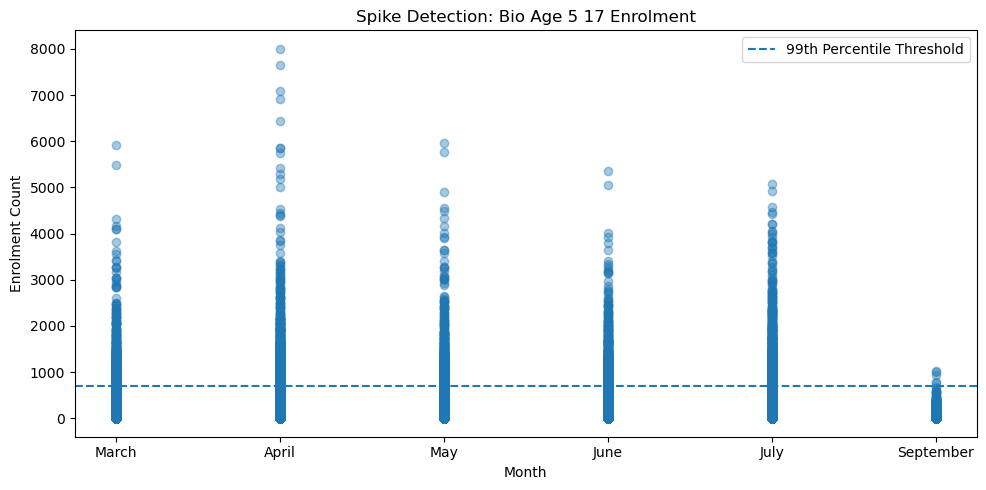

C:\Users\DELL\AppData\Local\Temp\ipykernel_13296\1345144187.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\DELL\anaconda3\envs\clean_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


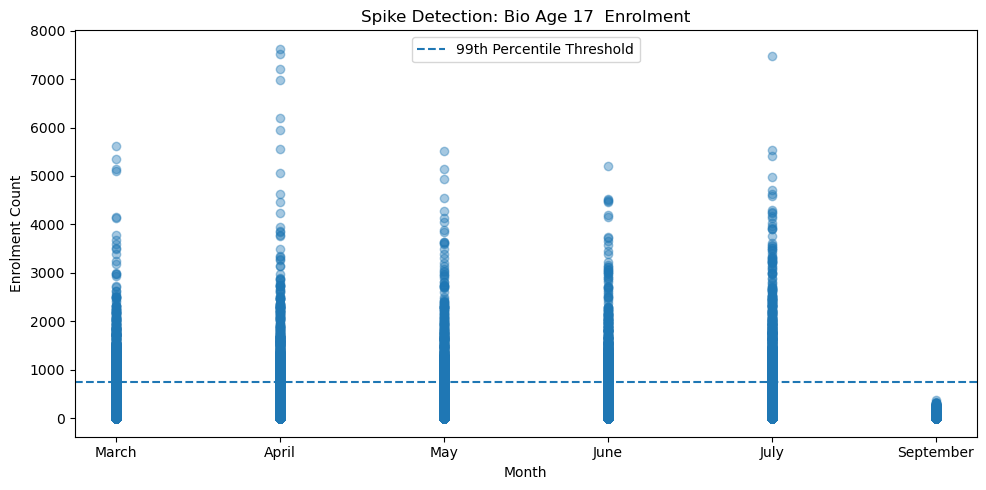

In [73]:
#Spike Detection for ALL 2 Age Groups (Separate Graphs)
age_columns = ['bio_age_5_17', 'bio_age_17_']

for col in age_columns:
    
    threshold_99 = df[col].quantile(0.99)

    spike_records = df[df[col] > threshold_99]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(df['month'], df[col], alpha=0.4)
    plt.axhline(threshold_99, linestyle='--', label='99th Percentile Threshold')
    
    plt.title(f'Spike Detection: {col.replace("_", " ").title()} Enrolment')
    plt.xlabel('Month')
    plt.ylabel('Enrolment Count')
    plt.legend()
    plt.tight_layout()
    plt.show()
